# 使用CNN來做圖片辨識，把每個參數都調整，試試看哪樣的模型最好!
使用mnist 資料庫

In [2]:
%env KERAS_BACKEND=tensorflow
%matplotlib widget
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

env: KERAS_BACKEND=tensorflow


In [21]:
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = tf.image.per_image_standardization(x_train)
#x_test = tf.image.per_image_standardization(x_test)
x_train = x_train.reshape(60000, 28, 28, 1) #最後面的維度通常是RGB顏色種類
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255 ## 資料正規化
x_test = x_test/255 ## 資料正規化

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, SpatialDropout2D
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.callbacks import History

## Convolution 5個filter, filtersize=6*6

In [62]:
model = Sequential()
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1))) #convolution 通常越來越多 且需要整除
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2))) #max-pooling 通常 Max-pooling 越來越多
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第一組完成
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第二組完成
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#第四組完成
#以下需要接fully connected
#model.add(SpatialDropout2D(0.5))
model.add(Flatten())
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dense(60))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=0.087), metrics=['accuracy'])
model.summary()
plot_model(model, to_file='wk9_CNN_model.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_103 (Activation)  (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_104 (Activation)  (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 7, 7, 16)          3216      
__________

## 模型流程圖
<img src="wk9_CNN_model.png">

## 訓練

In [63]:
model.fit(x_train, y_train, batch_size=100, epochs=10) 
#model.fit
#old 0.9682

Epoch 1/10
60000/60000 [==============================] - 17s 277us/step - loss: 1.0892 - acc: 0.6498
Epoch 2/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.2177 - acc: 0.9356
Epoch 3/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.1695 - acc: 0.9484
Epoch 4/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1505 - acc: 0.9534
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1360 - acc: 0.9581
Epoch 6/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1254 - acc: 0.9615
Epoch 7/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1163 - acc: 0.9639
Epoch 8/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.1088 - acc: 0.9661
Epoch 9/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.1023 - acc: 0.9677
Epoch 10/10
60000/60000 [==============================] - 15s 248us/step - loss: 

## 訓練結果檢視

In [65]:
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

10000/10000 [==============================] - 3s 296us/step
測試資料的 loss: 0.09313
測試資料的正確率: 0.9689


In [66]:
predict = model.predict_classes(x_test)

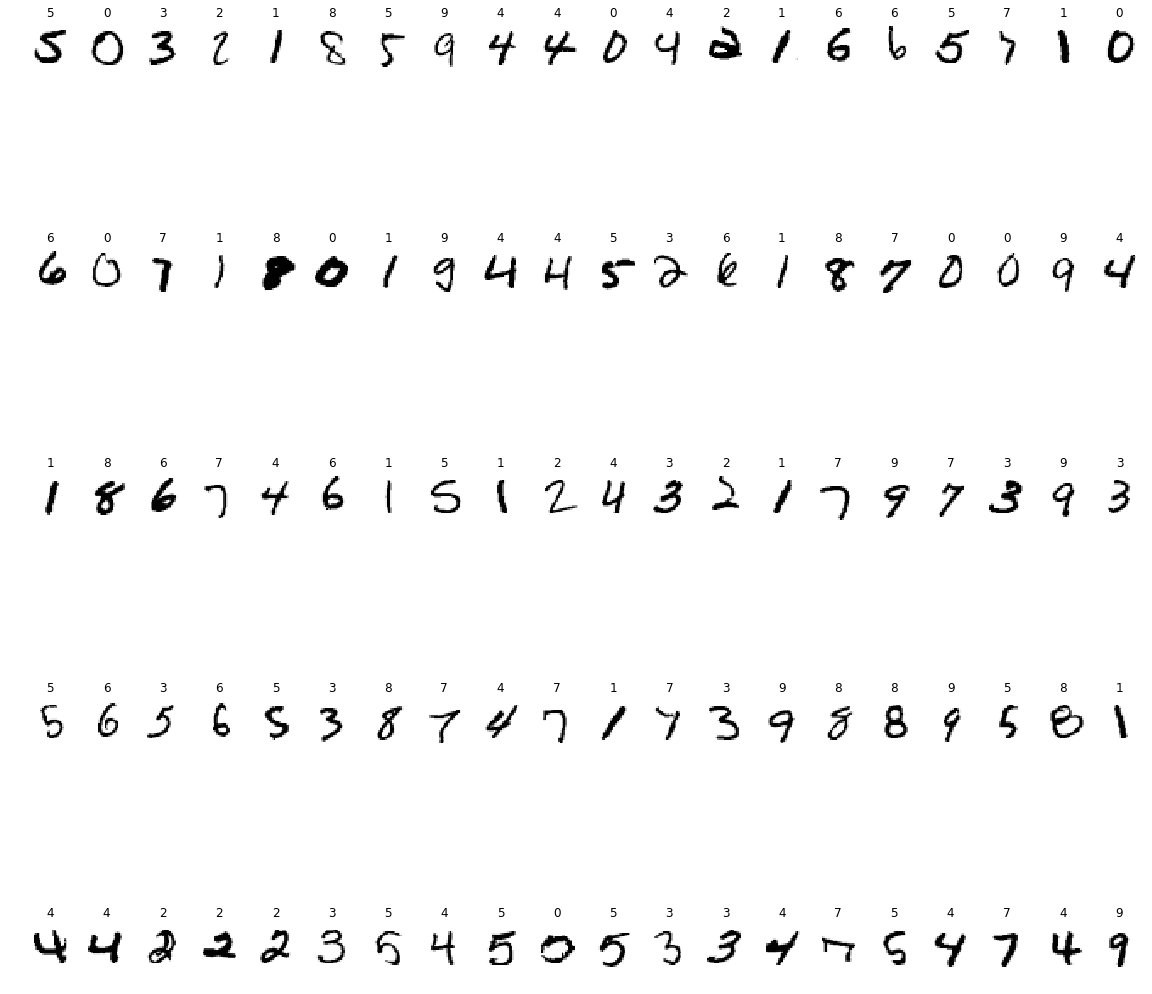

In [67]:
showresultnum = 100
picks = np.random.randint(1,9999, showresultnum)
plt.figure(figsize=(20,20))
for picki in range(showresultnum):
    i = picks[picki]
    plt.subplot(5,showresultnum/5,picki+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title(predict[i])
    plt.axis("off")